### Categorical Prediction

In this section, we will be converting all song_popularity into categories first, then training our models using this data to try and predict the actual song_popularity category in the test set.

We will be looking at the following models of Categorical Prediction:
1. Decision Tree
2. Random Forest
3. Neural Network

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# first seperating the dataframe into a df containing only predicted variables and a df only containing response variable
X_train1= pd.read_csv('x_train.csv')
X_train1=X_train1.drop(X_train1.columns[[0]], axis=1)
X_test1= pd.read_csv('x_test.csv')
X_test1=X_test1.drop(X_test1.columns[[0]], axis=1)
y_train1= pd.read_csv('y_train.csv')
y_train1=y_train1.drop(y_train1.columns[[0]], axis=1)
y_test1= pd.read_csv('y_test.csv')
y_test1=y_test1.drop(y_test1.columns[[0]], axis=1)

#Convert all song_popularity to categorical.
rangecheck=0
for x in range(4):
    if(x!=3):
        y_test1['song_popularity'] = np.where((y_test1['song_popularity'] >= rangecheck) & (y_test1['song_popularity'] < rangecheck+25), x, y_test1['song_popularity'])
        rangecheck+=25
    else:
        y_test1['song_popularity'] = np.where((y_test1['song_popularity'] >= rangecheck) & (y_test1['song_popularity'] <= rangecheck+25), x, y_test1['song_popularity'])

        
rangecheck=0
for x in range(4):
    if(x!=3):
        y_train1['song_popularity'] = np.where((y_train1['song_popularity'] >= rangecheck) & (y_train1['song_popularity'] < rangecheck+25), x, y_train1['song_popularity'])
        rangecheck+=25
    else:
        y_train1['song_popularity'] = np.where((y_train1['song_popularity'] >= rangecheck) & (y_train1['song_popularity'] <= rangecheck+25), x, y_train1['song_popularity'])
    

In [110]:
X_train1=X_train1.values[:,0:25]
X_test1=X_test1.values[:,0:25]
y_train1=y_train1.values[:,0]
y_test1=y_test1.values[:,0]

In [111]:
#We create 5 copies for later usage, Total of 6. 3 for Decision Tree, Random Forest, and Neural Network. Another 3 for Oversampling on those models
X_train2=X_train1.copy()
X_test2=X_test1.copy()
y_train2=y_train1.copy()
y_test2=y_test1.copy()

X_train3=X_train1.copy()
X_test3=X_test1.copy()
y_train3=y_train1.copy()
y_test3=y_test1.copy()

X_train4=X_train1.copy()
X_test4=X_test1.copy()
y_train4=y_train1.copy()
y_test4=y_test1.copy()

#Train sets for these will be obtained from SMOTE Later.
X_test5=X_test1.copy()
y_test5=y_test1.copy()

X_test6=X_test1.copy()
y_test6=y_test1.copy()

### 1. Decision Tree 


In [112]:
#We create a Decision Tree model to predict the song popularity cagetory
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

parameters = {
    "criterion":['gini','entropy'],
    "max_depth":range(2,60,5),
    "min_samples_leaf":range(1,200,20),
    "min_samples_split":range(2,300,20),
    "max_features":['auto','log2']
}

#Hyperparameter optimization
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)
DT_grid.fit(X_train1,y_train1)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 60, 5),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 200, 20),
                                        'min_samples_split': range(2, 300, 20)},
                   verbose=True)

In [113]:
DT_grid.best_estimator_

DecisionTreeClassifier(max_depth=52, max_features='auto', min_samples_leaf=181,
                       min_samples_split=202)

In [147]:
#Update parameters according to best estimator
DT_Model = DecisionTreeClassifier(max_depth=52,min_samples_leaf=181,max_features='auto',min_samples_split=202)
DT_Model.fit(X_train1,y_train1)
y_test_pred1=DT_Model.predict(X_test1)


TPR:  [0.         0.22437137 0.85089686 0.        ]
TNR:  [1.         0.85384615 0.18702703 1.        ]
FPR:  [0.         0.14615385 0.81297297 0.        ]
FNR:  [1.         0.77562863 0.14910314 1.        ]
Accuracy:  [0.86626307 0.67473858 0.51293341 0.90919097]
Accuracy (Whole Table):  0.48156301596037426


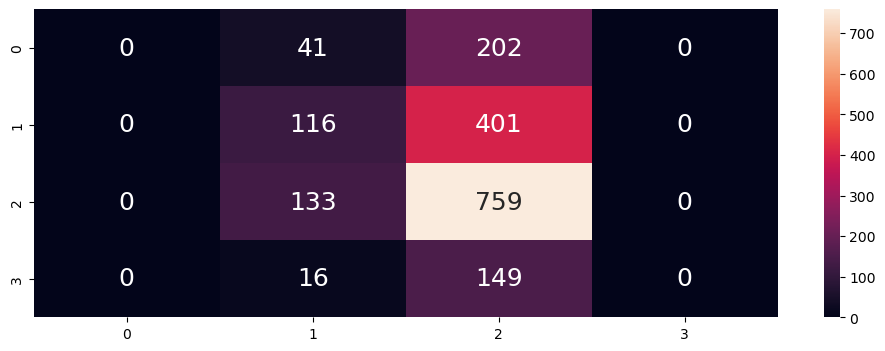

In [157]:
#Visualise Confusion matrix and model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM1=confusion_matrix(y_test1, y_test_pred1)
sb.heatmap(CM1, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPDT = CM1.sum(axis=0) - np.diag(CM1) 
FNDT = CM1.sum(axis=1) - np.diag(CM1)
TPDT = np.diag(CM1)
TNDT = CM1.sum() - (FPDT + FNDT + TPDT)
FPDT = FPDT.astype(float)
FNDT = FNDT.astype(float)
TPDT = TPDT.astype(float)
TNDT = TNDT.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRDT = TPDT/(TPDT+FNDT)
# Specificity or true negative rate
TNRDT = TNDT/(TNDT+FPDT) 
# Fall out or false positive rate
FPRDT = FPDT/(FPDT+TNDT)
# False negative rate
FNRDT = FNDT/(TPDT+FNDT)

#Accuracy
ACCDT = (TPDT+TNDT)/(TPDT+FPDT+FNDT+TNDT)

#Overall Accuracy
TOTALACCDT=accuracy_score(y_test1,y_test_pred1)

print("TPR: ",TPRDT)
print("TNR: ",TNRDT)
print("FPR: ",FPRDT)
print("FNR: ",FNRDT)
print("Accuracy: ",ACCDT)
print("Accuracy (Whole Table): ",accuracy_score(y_test1,y_test_pred1))

### 2. Random Forest 
Random Forest grows multiple decision trees via bagging, whose decisions are then merged together for a more accurate prediction.

In [117]:
from sklearn.ensemble import RandomForestClassifier

RandomForest=RandomForestClassifier(random_state=42)
parameters={
    "n_estimators":[90,100,115,130],
    "criterion":['gini','entropy'],
    "max_depth":range(2,60,5),
    "min_samples_leaf":range(1,200,20),
    "min_samples_split":range(2,300,20),
    "max_features":['auto','log2']
}

RF_grid=RandomizedSearchCV(estimator=RandomForest,param_distributions=parameters,cv=5,n_jobs=-1,verbose=3)
RF_grid.fit(X_train2,y_train2)
RF_grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 90,
 'min_samples_split': 122,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 32,
 'criterion': 'entropy'}

In [150]:
#Update parameters according to best estimator
RandomForest=RandomForestClassifier(n_estimators=90,min_samples_split=122,min_samples_leaf=1,max_features='auto',max_depth=32,criterion='entropy')
RandomForest.fit(X_train2,y_train2)
y_test_pred2=RandomForest.predict(X_test2)

TPR:  [0.         0.1237911  0.95964126 0.        ]
TNR:  [1.         0.95769231 0.08972973 1.        ]
FPR:  [0.         0.04230769 0.91027027 0.        ]
FNR:  [1.         0.8762089  0.04035874 1.        ]
Accuracy:  [0.86626307 0.72041827 0.51678591 0.90919097]
Accuracy (Whole Table):  0.5063291139240507


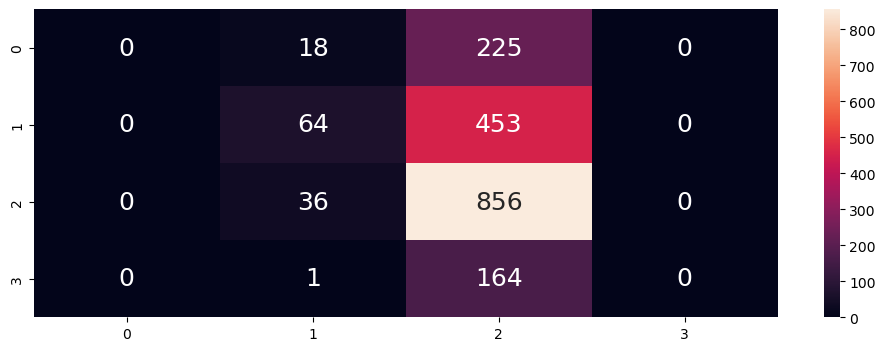

In [158]:
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM2=confusion_matrix(y_test2, y_test_pred2)
sb.heatmap(CM2, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPRF = CM2.sum(axis=0) - np.diag(CM2) 
FNRF = CM2.sum(axis=1) - np.diag(CM2)
TPRF = np.diag(CM2)
TNRF = CM2.sum() - (FPRF + FNRF + TPRF)
FPRF = FPRF.astype(float)
FNRF = FNRF.astype(float)
TPRF = TPRF.astype(float)
TNRF = TNRF.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRRF = TPRF/(TPRF+FNRF)
# Specificity or true negative rate
TNRRF = TNRF/(TNRF+FPRF) 
# Fall out or false positive rate
FPRRF = FPRF/(FPRF+TNRF)
# False negative rate
FNRRF = FNRF/(TPRF+FNRF)

# Accuracy
ACCRF = (TPRF+TNRF)/(TPRF+FPRF+FNRF+TNRF)

#Overall Accuracy
TOTALACCRF=accuracy_score(y_test2,y_test_pred2)


print("TPR: ",TPRRF)
print("TNR: ",TNRRF)
print("FPR: ",FPRRF)
print("FNR: ",FNRRF)
print("Accuracy: ",ACCRF)
print("Accuracy (Whole Table): ",accuracy_score(y_test2,y_test_pred2))

### 3. Neural Networks
We import tensorflow and create a neural network model to train and predict the song_popularity category.

As Neural Networks have many hyperparameters that can influence the accuracy of the model, we use Keras Tuner to test multiple combinations of hyperparamters (epochs, activation functions, number of Neurons in layers, learning rate) using validation sets within the test sets, and obtain the model with the best accuracy.

In [120]:
#Neural Network Implementation
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import keras_tuner as kt

#Convert y to categorical 
y_train3=pd.Series(y_train3)
y_train3= to_categorical(y_train3)
y_test3=pd.Series(y_test3)
y_test3=to_categorical(y_test3)

#Define Neural Network Model
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(25,)))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
  hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
  model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
  model.add(tf.keras.layers.Dense(4, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy'])
  
  return model


tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='dir',
                     project_name='x',
                     overwrite=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [121]:
tuner.search(X_train3, y_train3, epochs=10, validation_split=0.2, callbacks=[stop_early])


Trial 254 Complete [00h 00m 04s]
val_accuracy: 0.5010323524475098

Best val_accuracy So Far: 0.5072264075279236
Total elapsed time: 00h 12m 03s
INFO:tensorflow:Oracle triggered exit


In [122]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [123]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train3, y_train3, epochs=50, validation_split=0.2,
                    callbacks=[stop_early])
history.history

Epoch 1/50
182/182 [==============================] - 1s 2ms/step - loss: 1.2952 - accuracy: 0.4325 - val_loss: 1.2239 - val_accuracy: 0.4831
Epoch 2/50
182/182 [==============================] - 0s 1ms/step - loss: 1.1931 - accuracy: 0.4848 - val_loss: 1.2113 - val_accuracy: 0.4859
Epoch 3/50
182/182 [==============================] - 0s 1ms/step - loss: 1.1807 - accuracy: 0.4917 - val_loss: 1.2060 - val_accuracy: 0.4825
Epoch 4/50
182/182 [==============================] - 0s 1ms/step - loss: 1.1733 - accuracy: 0.4944 - val_loss: 1.2006 - val_accuracy: 0.4948
Epoch 5/50
182/182 [==============================] - 0s 1ms/step - loss: 1.1684 - accuracy: 0.5004 - val_loss: 1.1997 - val_accuracy: 0.4886
Epoch 6/50
182/182 [==============================] - 0s 1ms/step - loss: 1.1643 - accuracy: 0.5025 - val_loss: 1.1969 - val_accuracy: 0.4962
Epoch 7/50
182/182 [==============================] - 0s 1ms/step - loss: 1.1609 - accuracy: 0.5034 - val_loss: 1.1961 - val_accuracy: 0.4935
Epoch 

{'loss': [1.295196533203125,
  1.193122386932373,
  1.1806622743606567,
  1.1733134984970093,
  1.1684025526046753,
  1.1643378734588623,
  1.1609179973602295,
  1.1581041812896729,
  1.1553224325180054,
  1.1524420976638794,
  1.1506199836730957,
  1.1482999324798584,
  1.1467037200927734,
  1.1442803144454956,
  1.142540693283081,
  1.140860676765442],
 'accuracy': [0.4324556887149811,
  0.484770268201828,
  0.49165377020835876,
  0.49440714716911316,
  0.5004302263259888,
  0.502495288848877,
  0.5033556818962097,
  0.5049045085906982,
  0.5059370398521423,
  0.5055928230285645,
  0.5074858069419861,
  0.5095508694648743,
  0.5066253542900085,
  0.5095508694648743,
  0.5100671052932739,
  0.5107554793357849],
 'val_loss': [1.223940372467041,
  1.2112514972686768,
  1.2059811353683472,
  1.20062255859375,
  1.1997374296188354,
  1.196918249130249,
  1.1960808038711548,
  1.1943638324737549,
  1.1942026615142822,
  1.1920870542526245,
  1.1928555965423584,
  1.1914509534835815,
  1.19

57/57 [==============================] - 0s 588us/step
TPR:  [0.         0.16441006 0.90358744 0.        ]
TNR:  [1.         0.90461538 0.13297297 1.        ]
FPR:  [0.         0.09538462 0.86702703 0.        ]
FNR:  [1.         0.83558994 0.09641256 1.        ]
Accuracy:  [0.86626307 0.6940011  0.51128233 0.90919097]
Accuracy (Whole Table):  0.49036873968079253


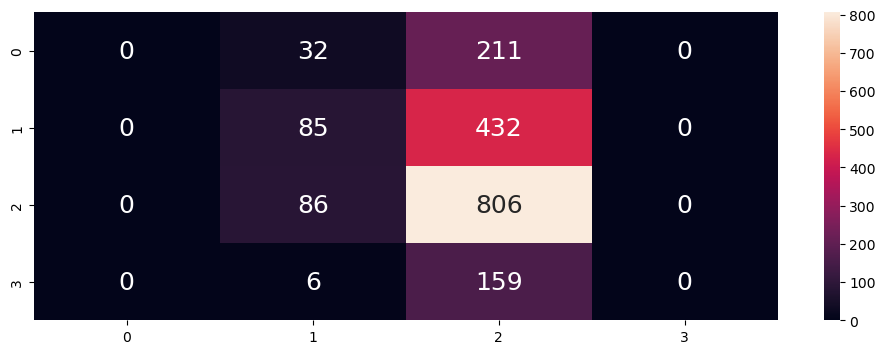

In [124]:
y_pred_class3=np.argmax(model.predict(X_test3), axis=-1)
y_pred3 = model.predict(X_test3)
y_test_class3 = np.argmax(y_test3, axis=1)
CM3=confusion_matrix(y_test_class3, y_pred_class3)
f, axes = plt.subplots(1,1,figsize=(12, 4))
sb.heatmap(CM3, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPNN = CM3.sum(axis=0) - np.diag(CM3) 
FNNN = CM3.sum(axis=1) - np.diag(CM3)
TPNN = np.diag(CM3)
TNNN = CM3.sum() - (FPNN + FNNN + TPNN)
FPNN = FPNN.astype(float)
FNNN = FNNN.astype(float)
TPNN = TPNN.astype(float)
TNNN = TNNN.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRNN = TPNN/(TPNN+FNNN)
# Specificity or true negative rate
TNRNN = TNNN/(TNNN+FPNN) 
# Fall out or false positive rate
FPRNN = FPNN/(FPNN+TNNN)
# False negative rate
FNRNN = FNNN/(TPNN+FNNN)

#Accuracy
ACCNN = (TPNN+TNNN)/(TPNN+FPNN+FNNN+TNNN)

#Overall Accuracy
TOTALACCNN=accuracy_score(y_test_class3,y_pred_class3)

print("TPR: ",TPRNN)
print("TNR: ",TNRNN)
print("FPR: ",FPRNN)
print("FNR: ",FNRNN)
print("Accuracy: ",ACCNN)

print("Accuracy (Whole Table): ",accuracy_score(y_test_class3,y_pred_class3))

### SMOTE Oversampling
Imbalanced datasets can affect the quality of the classification. It could be difficult to obtain good generalization for poorly represented classes. 

In this section, we display the data imbalance and utlise SMOTE to create synthetic samples for the minority class to reduce class imbalance. This algorithm helps to overcome the overfitting problem posed by random oversampling since it doesn't simply duplicate existing data.


Class=2, n=3537 (48.692%)
Class=0, n=957 (13.175%)
Class=1, n=2087 (28.731%)
Class=3, n=683 (9.403%)


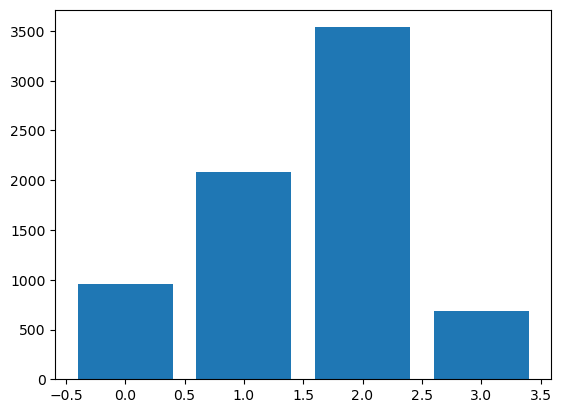

In [125]:
#Doing SMOTE Oversampling for all models
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

#Showcase Class imbalance
y_train4 = LabelEncoder().fit_transform(y_train4)
counter = Counter(y_train4)
for k,v in counter.items():
    per = v / len(y_train4) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution to see imbalance
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=3537 (25.000%)
Class=0, n=3537 (25.000%)
Class=1, n=3537 (25.000%)
Class=3, n=3537 (25.000%)


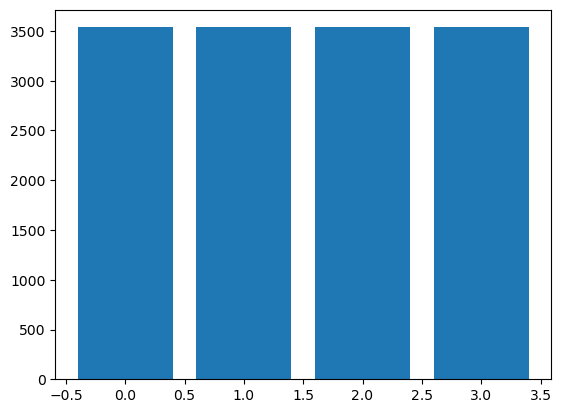

In [126]:
# label encode the train target variable
# https://machinelearningmastery.com/multi-class-imbalanced-classification/
y_train4 = LabelEncoder().fit_transform(y_train4)
# transform the dataset
oversample = SMOTE()
X_train4, y_train4 = oversample.fit_resample(X_train4, y_train4)
# summarize distribution
counter = Counter(y_train4)
for k,v in counter.items():
    per = v / len(y_train4) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### 4. Decision Tree (SMOTE Oversampled)

In [127]:
#Start for Decision Tree

#create 2 copies of train set for test sets 5 and 6

X_train5=X_train4.copy()
y_train5=y_train4.copy()
X_train6=X_train4.copy()
y_train6=y_train4.copy()


In [128]:
#Decision tree with SMOTE oversampling
parameters = {
    "criterion":['gini','entropy'],
    "max_depth":range(2,60,5),
    "min_samples_leaf":range(1,200,20),
    "min_samples_split":range(2,300,20),
    "max_features":['auto','log2']
}

#Hyperparameter optimization
DT_gridOS  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)
DT_gridOS.fit(X_train5,y_train5)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 60, 5),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 200, 20),
                                        'min_samples_split': range(2, 300, 20)},
                   verbose=True)

In [129]:
DT_gridOS.best_estimator_

DecisionTreeClassifier(max_depth=52, max_features='auto', min_samples_leaf=21,
                       min_samples_split=82)

In [152]:
#Update parameters according to best estimator
DT_ModelOS = DecisionTreeClassifier(max_depth=52,max_features='auto',min_samples_leaf=21,min_samples_split=82)
DT_ModelOS.fit(X_train5,y_train5)
y_test_pred5=DT_ModelOS.predict(X_test5)

TPR:  [0.24279835 0.28046422 0.3396861  0.32727273]
TNR:  [0.79288437 0.76692308 0.66486486 0.80811138]
FPR:  [0.20711563 0.23307692 0.33513514 0.19188862]
FNR:  [0.75720165 0.71953578 0.6603139  0.67272727]
Accuracy:  [0.71931756 0.62850853 0.5052284  0.76444689]
Accuracy (Whole Table):  0.30875068794716565


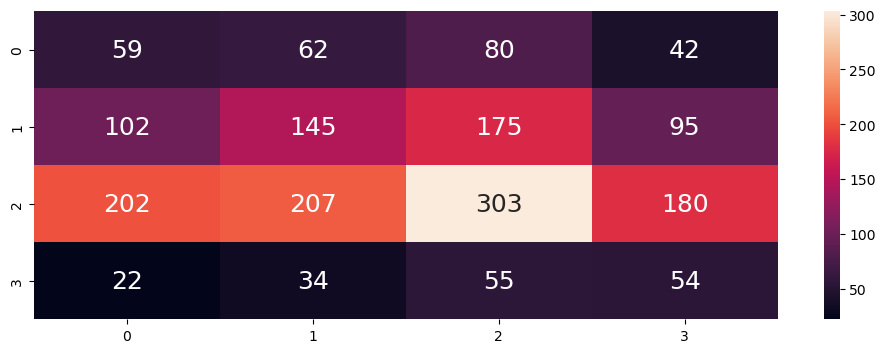

In [159]:
#Visualise Confusion matrix and model accuracy
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM5=confusion_matrix(y_test5, y_test_pred5)
sb.heatmap(CM5, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPDTOS = CM5.sum(axis=0) - np.diag(CM5) 
FNDTOS = CM5.sum(axis=1) - np.diag(CM5)
TPDTOS = np.diag(CM5)
TNDTOS = CM5.sum() - (FPDTOS + FNDTOS + TPDTOS)
FPDTOS = FPDTOS.astype(float)
FNDTOS = FNDTOS.astype(float)
TPDTOS = TPDTOS.astype(float)
TNDTOS = TNDTOS.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRDTOS = TPDTOS/(TPDTOS+FNDTOS)
# Specificity or true negative rate
TNRDTOS = TNDTOS/(TNDTOS+FPDTOS) 
# Fall out or false positive rate
FPRDTOS = FPDTOS/(FPDTOS+TNDTOS)
# False negative rate
FNRDTOS = FNDTOS/(TPDTOS+FNDTOS)

# Accuracy
ACCDTOS = (TPDTOS+TNDTOS)/(TPDTOS+FPDTOS+FNDTOS+TNDTOS)

#Overall Accuracy
TOTALACCDTOS=accuracy_score(y_test5,y_test_pred5)

print("TPR: ",TPRDTOS)
print("TNR: ",TNRDTOS)
print("FPR: ",FPRDTOS)
print("FNR: ",FNRDTOS)
print("Accuracy: ",ACCDTOS)
print("Accuracy (Whole Table): ",accuracy_score(y_test5,y_test_pred5))

### 5. Random Forest (SMOTE Oversampled)

In [132]:
#Random Forest with SMOTE Oversampling

RandomForestOS=RandomForestClassifier(random_state=42)
parameters={
    "n_estimators":[90,100,115,130],
    "criterion":['gini','entropy'],
    "max_depth":range(2,60,5),
    "min_samples_leaf":range(1,200,20),
    "min_samples_split":range(2,300,20),
    "max_features":['auto','log2']
}

RF_gridOS=RandomizedSearchCV(estimator=RandomForestOS,param_distributions=parameters,cv=5,n_jobs=-1,verbose=3)
RF_gridOS.fit(X_train6,y_train6)
RF_gridOS.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 57,
 'criterion': 'gini'}

In [154]:
RandomForestOS=RandomForestClassifier(n_estimators=90,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=57,criterion='gini')
RandomForestOS.fit(X_train6,y_train6)
y_test_pred6=RandomForestOS.predict(X_test6)

TPR:  [0.10288066 0.33655706 0.57623318 0.18787879]
TNR:  [0.91994917 0.76       0.45297297 0.92191283]
FPR:  [0.08005083 0.24       0.54702703 0.07808717]
FNR:  [0.89711934 0.66344294 0.42376682 0.81212121]
Accuracy:  [0.81067694 0.63951569 0.51348376 0.85525592]
Accuracy (Whole Table):  0.40946615299944966


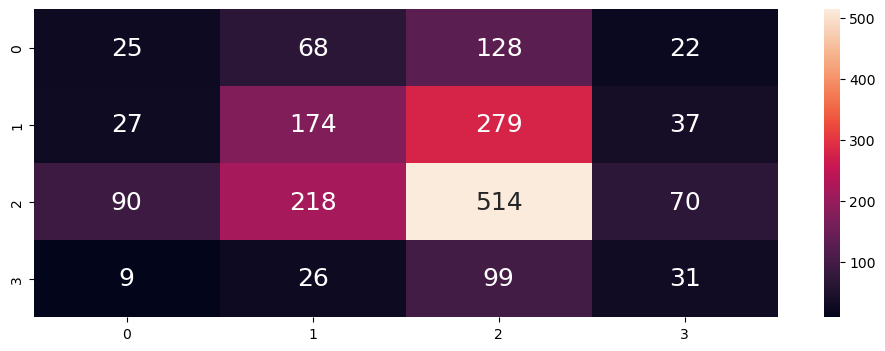

In [156]:
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM6=confusion_matrix(y_test6, y_test_pred6)
sb.heatmap(CM6, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPRFOS = CM6.sum(axis=0) - np.diag(CM6) 
FNRFOS = CM6.sum(axis=1) - np.diag(CM6)
TPRFOS = np.diag(CM6)
TNRFOS = CM6.sum() - (FPRFOS + FNRFOS + TPRFOS)
FPRFOS = FPRFOS.astype(float)
FNRFOS = FNRFOS.astype(float)
TPRFOS = TPRFOS.astype(float)
TNRFOS = TNRFOS.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRRFOS = TPRFOS/(TPRFOS+FNRFOS)
# Specificity or true negative rate
TNRRFOS = TNRFOS/(TNRFOS+FPRFOS) 
# Fall out or false positive rate
FPRRFOS = FPRFOS/(FPRFOS+TNRFOS)
# False negative rate
FNRRFOS = FNRFOS/(TPRFOS+FNRFOS)

# Accuracy
ACCRFOS = (TPRFOS+TNRFOS)/(TPRFOS+FPRFOS+FNRFOS+TNRFOS)

#Overall Accuracy
TOTALACCRFOS=accuracy_score(y_test6,y_test_pred6)

print("TPR: ",TPRRFOS)
print("TNR: ",TNRRFOS)
print("FPR: ",FPRRFOS)
print("FNR: ",FNRRFOS)
print("Accuracy: ",ACCRFOS)
print("Accuracy (Whole Table): ",accuracy_score(y_test6,y_test_pred6))

### 6. Neural Networks (SMOTE Oversampled)

In [135]:
#Neural Network with SMOTE Oversampling
#Convert both y to categorical encoding for Neural Network
y_train4=pd.Series(y_train4)
y_train4= to_categorical(y_train4)
y_test4=pd.Series(y_test4)
y_test4=to_categorical(y_test4)

In [136]:
#Reapply Neural Network models and hyperparameter tuning
def model_builder_oversample(hp):
  model2 = tf.keras.Sequential()
  model2.add(tf.keras.layers.Flatten(input_shape=(25,)))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
  hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model2.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
  model2.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
  model2.add(tf.keras.layers.Dense(4, activation='softmax'))

  model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy'])
  
  return model2


tuner_oversample = kt.Hyperband(model_builder_oversample,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='dir',
                     project_name='x',
                     overwrite=True)

stop_early_oversample = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [137]:
tuner_oversample.search(X_train4, y_train4,epochs=10, validation_split=0.2, callbacks=[stop_early])

Trial 254 Complete [00h 00m 29s]
val_accuracy: 0.4363957643508911

Best val_accuracy So Far: 0.877385139465332
Total elapsed time: 00h 23m 50s
INFO:tensorflow:Oracle triggered exit


In [138]:
best_hps_oversample = tuner_oversample.get_best_hyperparameters(num_trials=1)[0]

In [139]:
model_oversample = tuner_oversample.hypermodel.build(best_hps)
history = model_oversample.fit(X_train4, y_train4, epochs=50, validation_split=0.2,
                    callbacks=[stop_early])
history.history

Epoch 1/50
354/354 [==============================] - 1s 1ms/step - loss: 1.2787 - accuracy: 0.3440 - val_loss: 2.4403 - val_accuracy: 0.0000e+00
Epoch 2/50
354/354 [==============================] - 0s 1ms/step - loss: 1.2450 - accuracy: 0.3712 - val_loss: 2.4671 - val_accuracy: 0.0000e+00
Epoch 3/50
354/354 [==============================] - 0s 1ms/step - loss: 1.2327 - accuracy: 0.3912 - val_loss: 2.5153 - val_accuracy: 0.0000e+00
Epoch 4/50
354/354 [==============================] - 0s 1ms/step - loss: 1.2245 - accuracy: 0.3998 - val_loss: 2.4657 - val_accuracy: 0.0000e+00


{'loss': [1.2786953449249268,
  1.2450488805770874,
  1.2327418327331543,
  1.2244988679885864],
 'accuracy': [0.3439653515815735,
  0.37117865681648254,
  0.39123520255088806,
  0.39980560541152954],
 'val_loss': [2.440274477005005,
  2.4670655727386475,
  2.5152649879455566,
  2.465651750564575],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0]}

57/57 [==============================] - 0s 623us/step
TPR:  [0.23868313 0.51450677 0.367713   0.        ]
TNR:  [0.8068615  0.58461538 0.65297297 1.        ]
FPR:  [0.1931385  0.41538462 0.34702703 0.        ]
FNR:  [0.76131687 0.48549323 0.632287   1.        ]
Accuracy:  [0.73087507 0.56466703 0.51293341 0.90919097]
Accuracy (Whole Table):  0.3588332416070446


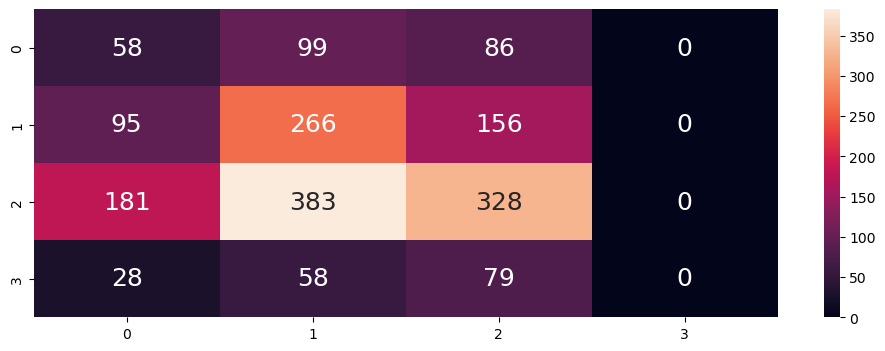

In [140]:
y_pred_class4=np.argmax(model_oversample.predict(X_test4), axis=-1)
y_pred4 = model_oversample.predict(X_test4)
y_test_class4 = np.argmax(y_test4, axis=1)
CM4=confusion_matrix(y_test_class4, y_pred_class4)
f, axes = plt.subplots(1,1,figsize=(12, 4))
sb.heatmap(CM4, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPNNOS = CM4.sum(axis=0) - np.diag(CM4) 
FNNNOS = CM4.sum(axis=1) - np.diag(CM4)
TPNNOS = np.diag(CM4)
TNNNOS = CM4.sum() - (FPNNOS + FNNNOS + TPNNOS)
FPNNOS = FPNNOS.astype(float)
FNNNOS = FNNNOS.astype(float)
TPNNOS = TPNNOS.astype(float)
TNNNOS = TNNNOS.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRNNOS = TPNNOS/(TPNNOS+FNNNOS)
# Specificity or true negative rate
TNRNNOS = TNNNOS/(TNNNOS+FPNNOS) 
# Fall out or false positive rate
FPRNNOS = FPNNOS/(FPNNOS+TNNNOS)
# False negative rate
FNRNNOS = FNNNOS/(TPNNOS+FNNNOS)

# accuracy
ACCNNOS = (TPNNOS+TNNNOS)/(TPNNOS+FPNNOS+FNNNOS+TNNNOS)

#Overall Accuracy
TOTALACCNNOS=accuracy_score(y_test_class4,y_pred_class4)

print("TPR: ",TPRNNOS)
print("TNR: ",TNRNNOS)
print("FPR: ",FPRNNOS)
print("FNR: ",FNRNNOS)
print("Accuracy: ",ACCNNOS)

print("Accuracy (Whole Table): ",accuracy_score(y_test_class4,y_pred_class4))

In [160]:
#Convert all TPR,FNR,TNR,FPR,Accuracy,Overall Accuracy to DataFrame BEFORE oversampling
TPRDTdf=pd.DataFrame(TPRDT)
TPRRFdf=pd.DataFrame(TPRRF)
TPRNNdf=pd.DataFrame(TPRNN)
TPRDTOSdf=pd.DataFrame(TPRDTOS)
TPRRFOSdf=pd.DataFrame(TPRRFOS)
TPRNNOSdf=pd.DataFrame(TPRNNOS)
TPRCompiled = pd.merge(TPRDTdf, TPRDTOSdf, left_index=True, right_index=True)
TPRCompiled = pd.merge(TPRCompiled, TPRRFdf, left_index=True, right_index=True)
TPRCompiled = pd.merge(TPRCompiled, TPRRFOSdf, left_index=True, right_index=True)
TPRCompiled = pd.merge(TPRCompiled, TPRNNdf, left_index=True, right_index=True)
TPRCompiled = pd.merge(TPRCompiled, TPRNNOSdf, left_index=True, right_index=True)


FNRDTdf=pd.DataFrame(FNRDT)
FNRRFdf=pd.DataFrame(FNRRF)
FNRNNdf=pd.DataFrame(FNRNN)
FNRDTOSdf=pd.DataFrame(FNRDTOS)
FNRRFOSdf=pd.DataFrame(FNRRFOS)
FNRNNOSdf=pd.DataFrame(FNRNNOS)

FNRCompiled = pd.merge(FNRDTdf, FNRDTOSdf, left_index=True, right_index=True)
FNRCompiled = pd.merge(FNRCompiled, FNRRFdf, left_index=True, right_index=True)
FNRCompiled = pd.merge(FNRCompiled, FNRRFOSdf, left_index=True, right_index=True)
FNRCompiled = pd.merge(FNRCompiled, FNRNNdf, left_index=True, right_index=True)
FNRCompiled = pd.merge(FNRCompiled, FNRNNOSdf, left_index=True, right_index=True)



TNRDTdf=pd.DataFrame(TNRDT)
TNRRFdf=pd.DataFrame(TNRRF)
TNRNNdf=pd.DataFrame(TNRNN)
TNRDTOSdf=pd.DataFrame(TNRDTOS)
TNRRFOSdf=pd.DataFrame(TNRRFOS)
TNRNNOSdf=pd.DataFrame(TNRNNOS)

TNRCompiled = pd.merge(TNRDTdf, TNRDTOSdf, left_index=True, right_index=True)
TNRCompiled = pd.merge(TNRCompiled, TNRRFdf, left_index=True, right_index=True)
TNRCompiled = pd.merge(TNRCompiled, TNRRFOSdf, left_index=True, right_index=True)
TNRCompiled = pd.merge(TNRCompiled, TNRNNdf, left_index=True, right_index=True)
TNRCompiled = pd.merge(TNRCompiled, TNRNNOSdf, left_index=True, right_index=True)



FPRDTdf=pd.DataFrame(FPRDT)
FPRRFdf=pd.DataFrame(FPRRF)
FPRNNdf=pd.DataFrame(FPRNN)
FPRDTOSdf=pd.DataFrame(FPRDTOS)
FPRRFOSdf=pd.DataFrame(FPRRFOS)
FPRNNOSdf=pd.DataFrame(FPRNNOS)
FPRCompiled = pd.merge(FPRDTdf, FPRDTOSdf, left_index=True, right_index=True)
FPRCompiled = pd.merge(FPRCompiled, FPRRFdf, left_index=True, right_index=True)
FPRCompiled = pd.merge(FPRCompiled, FPRRFOSdf, left_index=True, right_index=True)
FPRCompiled = pd.merge(FPRCompiled, FPRNNdf, left_index=True, right_index=True)
FPRCompiled = pd.merge(FPRCompiled, FPRNNOSdf, left_index=True, right_index=True)



ACCDTdf=pd.DataFrame(ACCDT)
ACCRFdf=pd.DataFrame(ACCRF)
ACCNNdf=pd.DataFrame(ACCNN)
ACCDTOSdf=pd.DataFrame(ACCDTOS)
ACCRFOSdf=pd.DataFrame(ACCRFOS)
ACCNNOSdf=pd.DataFrame(ACCNNOS)
ACCCompiled = pd.merge(ACCDTdf, ACCDTOSdf, left_index=True, right_index=True)
ACCCompiled = pd.merge(ACCCompiled, ACCRFdf, left_index=True, right_index=True)
ACCCompiled = pd.merge(ACCCompiled, ACCRFOSdf, left_index=True, right_index=True)
ACCCompiled = pd.merge(ACCCompiled, ACCNNdf, left_index=True, right_index=True)
ACCCompiled = pd.merge(ACCCompiled, ACCNNOSdf, left_index=True, right_index=True)

#Create data for overall accuracy
data = {'Decision Tree':TOTALACCDT,'Decision Tree (OS)':TOTALACCDTOS, 'Random Forest':TOTALACCRF,'Random Forest (OS)':TOTALACCRFOS, 'Neural Network':TOTALACCNN,'Neural Network (OS)':TOTALACCNNOS
       }
ModelUsed = list(data.keys())
OAccuracy = list(data.values())


C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_8360\354379366.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  TPRCompiled = pd.merge(TPRCompiled, TPRRFOSdf, left_index=True, right_index=True)
C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_8360\354379366.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  TPRCompiled = pd.merge(TPRCompiled, TPRNNOSdf, left_index=True, right_index=True)
C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_8360\354379366.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  FNRCompiled = pd.merge(FNRCompiled, FNRRFOSdf, left_index=True, right_index=True)
C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_8360\354379366.py:26: FutureWarning: Passing 'suffi

In [161]:
TPRCompiled.columns = ['Decision Tree','Decision Tree (OS)',  'Random Forest', 'Random Forest (OS)','Neural Network','Neural Network (OS)']
FNRCompiled.columns = ['Decision Tree','Decision Tree (OS)',  'Random Forest', 'Random Forest (OS)','Neural Network','Neural Network (OS)']
TNRCompiled.columns = ['Decision Tree','Decision Tree (OS)',  'Random Forest', 'Random Forest (OS)','Neural Network','Neural Network (OS)']
FPRCompiled.columns = ['Decision Tree','Decision Tree (OS)',  'Random Forest', 'Random Forest (OS)','Neural Network','Neural Network (OS)']
ACCCompiled.columns = ['Decision Tree','Decision Tree (OS)',  'Random Forest', 'Random Forest (OS)','Neural Network','Neural Network (OS)']

In [162]:
#Showcase overall Accuracy values for later use.
data

{'Decision Tree': 0.48156301596037426,
 'Decision Tree (OS)': 0.30875068794716565,
 'Random Forest': 0.5063291139240507,
 'Random Forest (OS)': 0.40946615299944966,
 'Neural Network': 0.49036873968079253,
 'Neural Network (OS)': 0.3588332416070446}

### Extract results
We extract the results to a CSV file to be compared with Numerical Prediction results later.

In [163]:
TPRCompiled.to_csv("TPR_Cat.csv")
FNRCompiled.to_csv("FNR_Cat.csv")
TNRCompiled.to_csv("TNR_Cat.csv")
FPRCompiled.to_csv("FPR_Cat.csv")
ACCCompiled.to_csv("ACC_Cat.csv")